In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
import os

In [48]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split 

In [104]:
df = pd.read_csv('/content/drive/MyDrive/orthopedic_patients/column_2C_weka.csv')

In [105]:
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [106]:
df.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [108]:
df['class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

In [109]:
df.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [110]:
df.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

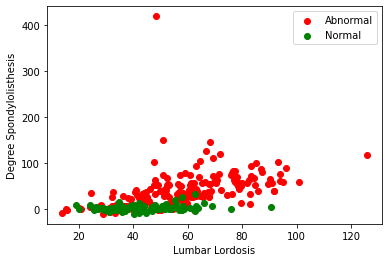

In [99]:
abnormal = df[df['class'] == 'Abnormal']
normal = df[df['class'] == 'Normal']
plt.scatter(abnormal.lumbar_lordosis_angle, abnormal.degree_spondylolisthesis, color = 'red', label = 'Abnormal')
plt.scatter(normal.lumbar_lordosis_angle, normal.degree_spondylolisthesis, color = 'green', label = 'Normal') 
plt.legend() 
plt.xlabel('Lumbar Lordosis') 
plt.ylabel('Degree Spondylolisthesis')
plt.show()

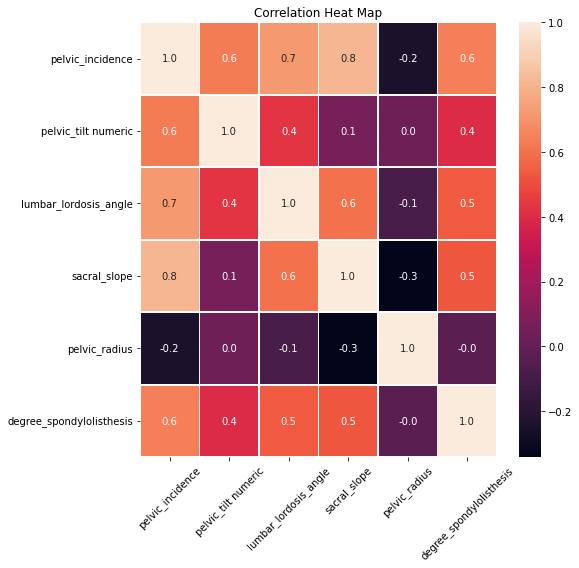

In [100]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(df.corr(), annot = True, linewidths = 0.7, fmt = '.1f', ax = ax)
plt.xticks(rotation = 45)  
plt.title('Correlation Heat Map') 
plt.show()

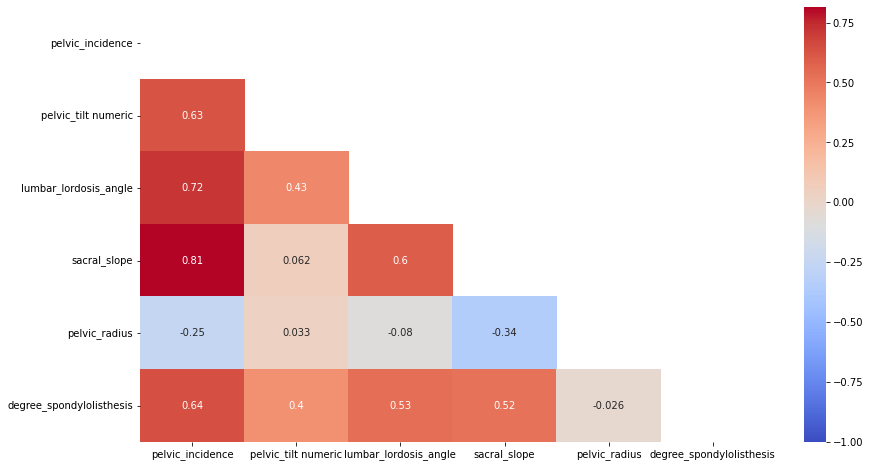

In [112]:
triu = np.triu(df.corr())
plt.figure(figsize = (14, 8))
sns.heatmap(df.corr(), annot = True, vmin = -1, cmap = 'coolwarm', mask = triu) 
plt.show()

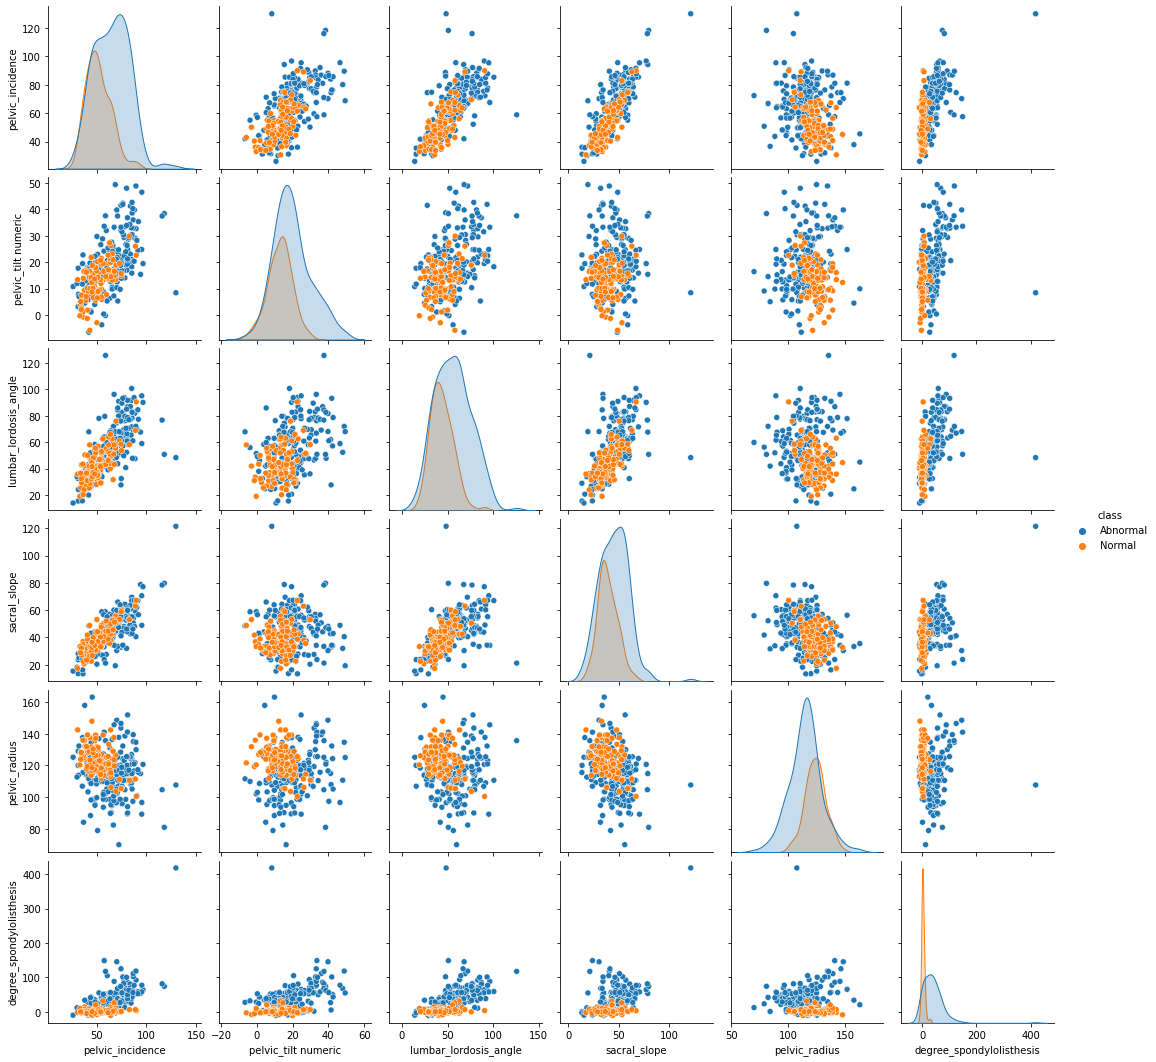

In [101]:
sns.pairplot(df, hue = 'class')
plt.show()

Converting Normal to 1 and Abnormal to 0.

In [102]:
df['class'] = [1 if each == 'Normal' else 0 for each in df['class']]

In [103]:
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


normalized = (value - min. value of the feature) / (max value of the feature - min. value of the feature)

In [74]:
df = (df - np.min(df)) / (np.max(df) - np.min(df))

In [75]:
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148,0.0
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365,0.0
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523,0.0
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838,0.0
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173,0.0


In [76]:
x = df.drop('class', axis = 1)  #feature
y = df['class'] #target

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1, test_size = 0.3)

In [78]:
def plot_confusion_matrix(y_true, y_pred):
  cn = confusion_matrix(y_true = y_true, y_pred = y_pred) 
  
  fig, ax = plt.subplots(figsize = (5, 5)) 
  sns.heatmap(cn, annot = True, linewidths = 1.5)
  plt.show()
  return cn

In [79]:
score_list = {}

# **KNN Classification**

Text(0, 0.5, 'Score accuracy')

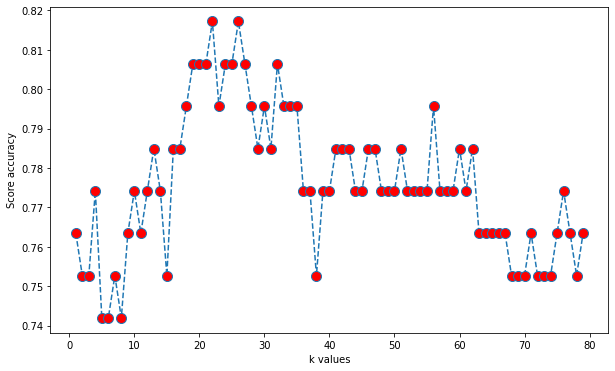

In [92]:
temp = []
for each in range(1, 80):
  knn = KNeighborsClassifier(n_neighbors = each) 
  knn.fit(x_train, y_train)
  temp.append(knn.score(x_test, y_test)) 

plt.figure(figsize = (10, 6))
plt.plot(range(1, 80), temp, linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.xlabel('k values') 
plt.ylabel('Score accuracy')

In [82]:
max_accuracy_value = max(temp)
max_accuracy_k = temp.index(max_accuracy_value) + 1 
print('For max score k = {}, score = {}'.format(max_accuracy_k, max_accuracy_value))

For max score k = 22, score = 0.8172043010752689


In [83]:
KNN = KNeighborsClassifier(n_neighbors = 22) 
KNN.fit(x_train, y_train) 
knn_score = KNN.score(x_test, y_test)

In [84]:
print(f'Score is {knn_score}')

Score is 0.8172043010752689


In [85]:
score_list['KNN Classifier'] = knn_score

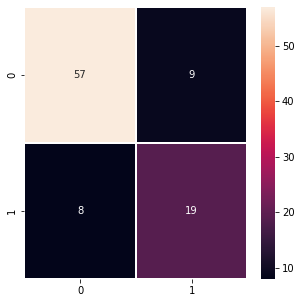

array([[57,  9],
       [ 8, 19]])

In [86]:
y_true = y_test 
y_pred = KNN.predict(x_test) 
plot_confusion_matrix(y_true, y_pred)

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87        66
         1.0       0.68      0.70      0.69        27

    accuracy                           0.82        93
   macro avg       0.78      0.78      0.78        93
weighted avg       0.82      0.82      0.82        93



# **Logistic Regression**

In [19]:
from sklearn.linear_model import LogisticRegression

In [23]:
LR = LogisticRegression() 
LR.fit(x_train, y_train) 
lr_score = LR.score(x_test, y_test) 

In [24]:
print(f'Score is {lr_score}')

Score is 0.7419354838709677


In [25]:
score_list['Logistic Regression'] = lr_score

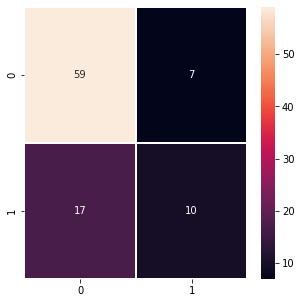

array([[59,  7],
       [17, 10]])

In [26]:
y_pred = LR.predict(x_test) 
plot_confusion_matrix(y_true, y_pred) 

# **Support Vector Machine Classification**

In [27]:
from sklearn.svm import SVC 
svc = SVC() 
svc.fit(x_train, y_train) 
svc_score = svc.score(x_test, y_test) 

In [28]:
print(f'Score is {svc_score}')

Score is 0.8064516129032258


In [29]:
score_list['SVC'] = svc_score

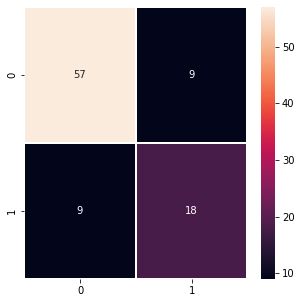

array([[57,  9],
       [ 9, 18]])

In [30]:
y_true = y_test 
y_pred = svc.predict(x_test) 
plot_confusion_matrix(y_true, y_pred) 

# **Naive Bayes Classification**

In [33]:
from sklearn.naive_bayes import GaussianNB 
nbc = GaussianNB()
nbc.fit(x_train, y_train) 
nbc_score = nbc.score(x_test, y_test) 

In [34]:
print(f'Score is {nbc_score}')

Score is 0.8172043010752689


In [35]:
score_list['GaussianNBC'] = nbc_score

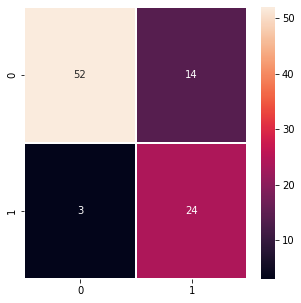

array([[52, 14],
       [ 3, 24]])

In [36]:
y_true = y_test 
y_pred = nbc.predict(x_test)
plot_confusion_matrix(y_true, y_pred)

# **Decision Tree Classification**

In [38]:
from sklearn.tree import DecisionTreeClassifier 
dtc = DecisionTreeClassifier(random_state = 1) 
dtc.fit(x_train, y_train)
dtc_score = dtc.score(x_test, y_test)

In [39]:
print(f'Score is {dtc_score}')

Score is 0.7849462365591398


In [40]:
score_list['DTC'] = dtc_score

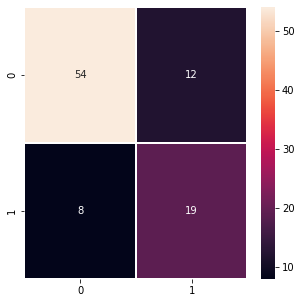

array([[54, 12],
       [ 8, 19]])

In [41]:
y_true = y_test 
y_pred = dtc.predict(x_test) 
plot_confusion_matrix(y_true, y_pred) 

# **Random Forest Classification**

In [44]:
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier(n_estimators = 50, random_state = 1)
rfc.fit(x_train, y_train)
rfc_score = rfc.score(x_test, y_test)

In [45]:
print(f'Score is {rfc_score}')

Score is 0.8709677419354839


In [46]:
score_list['RFC'] = rfc_score

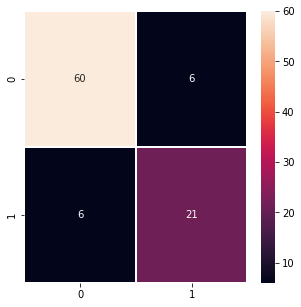

array([[60,  6],
       [ 6, 21]])

In [47]:
y_true = y_test 
y_pred = rfc.predict(x_test) 
plot_confusion_matrix(y_true, y_pred) 

In [48]:
score_list = list(score_list.items())

In [49]:
for alg, score in score_list: 
  print(f'{alg} Score is {str(score)[:4]}')

KNN Classifier Score is 0.81
Logistic Regression Score is 0.74
SVC Score is 0.80
GaussianNBC Score is 0.81
DTC Score is 0.78
RFC Score is 0.87


# **Testing label encoding**

In [114]:
df2 = pd.read_csv('/content/drive/MyDrive/orthopedic_patients/column_3C_weka.csv')

In [115]:
df2.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [116]:
from sklearn.preprocessing import LabelEncoder

In [117]:
la = LabelEncoder()
label = la.fit_transform(df2['class']) 
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [118]:
df.drop(['class'], axis = 1, inplace = True) 
df['class'] = label

In [119]:
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


# **Improving the models**

In [98]:
df1 = pd.read_csv('/content/drive/MyDrive/orthopedic_patients/column_2C_weka.csv')
df2 = pd.read_csv('/content/drive/MyDrive/orthopedic_patients/column_3C_weka.csv')

In [99]:
df1.head(3)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal


In [100]:
df2.head(3)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia


In [101]:
df1 = df1.rename(columns = {'pelvic_tilt numeric': 'pelvic_tilt'})

In [102]:
df = pd.concat([df1, df2], axis = 0)

In [103]:
df.shape

(620, 7)

In [104]:
df.head(3)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal


In [105]:
df[df.index.duplicated()]

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [106]:
df.reset_index(inplace = True)

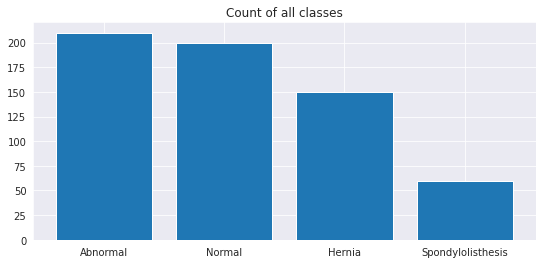

In [107]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize = (9, 4)) 
plt.bar(x = df['class'].unique(), height = df['class'].value_counts()) 
plt.title('Count of all classes');

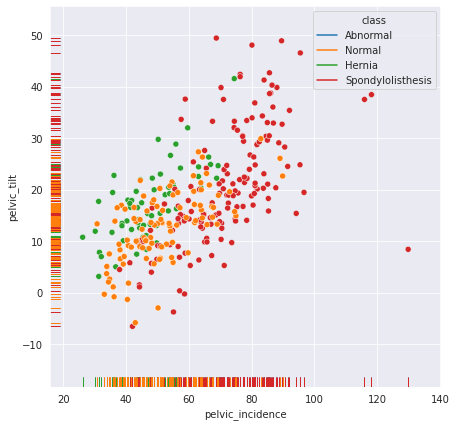

In [108]:
fig, ax = plt.subplots(figsize = (7, 7))
sns.scatterplot(data = df, x = 'pelvic_incidence', y = 'pelvic_tilt', hue = 'class');
sns.rugplot(data = df, x = 'pelvic_incidence', y = 'pelvic_tilt', hue = 'class');

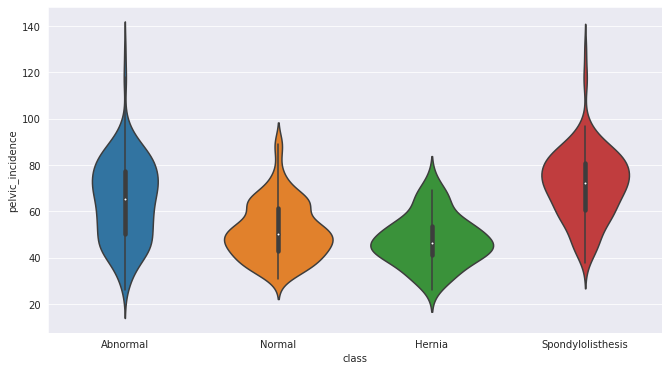

In [109]:
fig, ax = plt.subplots(figsize = (11, 6)) 
sns.violinplot(y = 'pelvic_incidence', x = 'class', data = df);

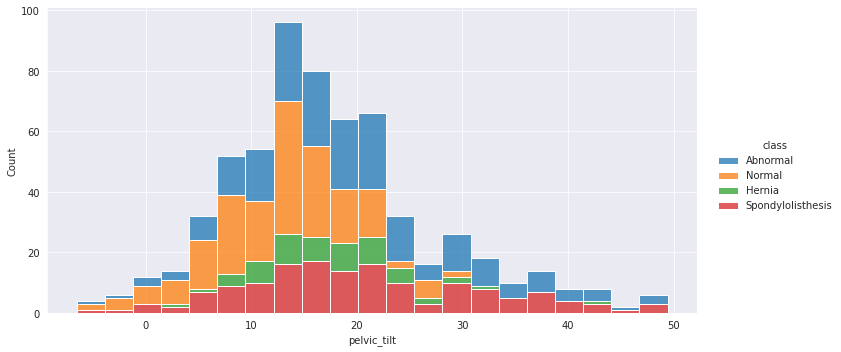

In [110]:
sns.displot(data = df, x = 'pelvic_tilt', aspect = 14/7, hue = 'class', multiple = 'stack');

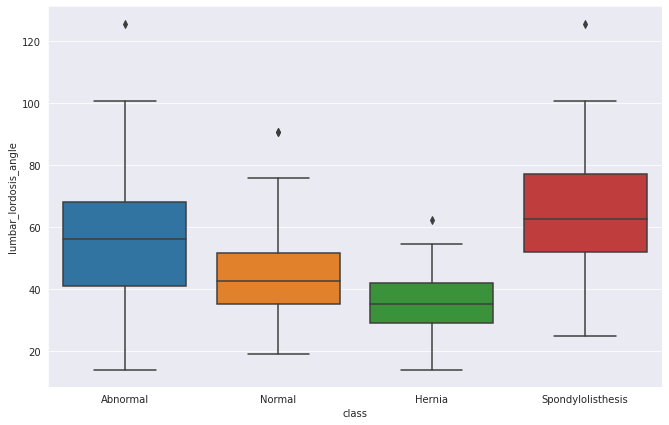

In [111]:
fig, ax = plt.subplots(figsize = (11, 7))
sns.boxplot(data = df, x = 'class', y = 'lumbar_lordosis_angle')

In [112]:
df['class'] = df['class'].replace({'Normal': 1,
                                   'Abnormal': 0,
                                   'Hernia': 0, 
                                   'Spondylolisthesis': 0})

In [113]:
x = df.drop('class', axis = 1)  #feature
y = df['class'] #target

In [114]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
x = sc.fit_transform(x) 

In [115]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1, test_size = 0.3)

<function matplotlib.pyplot.show(*args, **kw)>

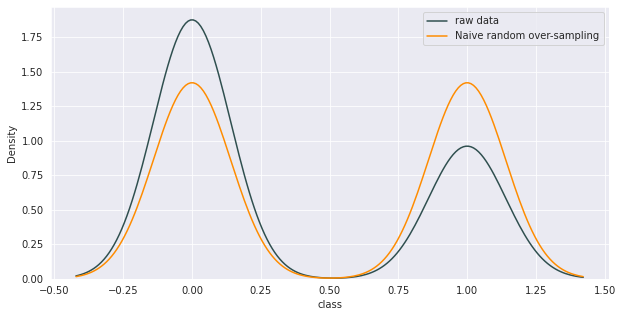

In [116]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 42)
x_resampled_naive, y_resampled_naive = ros.fit_resample(x_train, y_train) 
plt.figure(figsize = (10, 5)) 
sns.kdeplot(y_train, label = 'raw data', color = 'darkslategray') 
sns.kdeplot(y_resampled_naive, label = 'Naive random over-sampling', color = 'darkorange')
plt.legend() 
plt.show

In [88]:
KNN = KNeighborsClassifier(n_neighbors = 22) 
KNN.fit(x_train, y_train) 
knn_score = KNN.score(x_test, y_test)

In [89]:
knn_score

0.9623655913978495